### Problem 1

Given the iris data set, use the last two features "petal length" and "petal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{petal length} = 7$, $\text{petal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot the linear boundaries, and compare it with the LDA's boundary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
# load the iris dataset

from sklearn import datasets
iris = datasets.load_iris()

iris_x = iris.data[:,2:] # 'petal length' and 'petal width'
iris_y = iris.target.reshape(-1,1)  # species 

In [5]:
# fit a logistic regression model

logit = linear_model.LogisticRegression()
logit.set_params(C=1e4)
logit.fit(iris_x, iris_y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
# accuracy:

print 'logistic regression model accuracy: %.2f ' %logit.score(iris_x, iris_y)

logistic regression model accuracy: 0.96 


In [7]:
# prediction:

x_74 = np.array([[7,4]])
#print logit.predict(x_74)
print 'species prediction: %s' %str(list(iris.target_names)[logit.predict(x_74)[0]])

species prediction: virginica


In [8]:
# defining the function to plot the decision boundaries:

def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

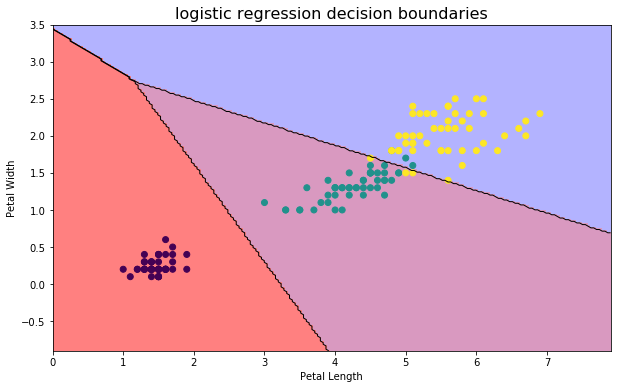

In [11]:
## Plotting logistic regression model decision boundaries
plt.figure(figsize=(10, 6))
plot_model(logit, iris_x[:, 0], iris_x[:, 1], label=iris_y)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("logistic regression decision boundaries", size = 16)

plt.show()

In [12]:
# fit an LDA model:

from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris_x, iris_y)
#print LDA.score(iris_x, iris_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

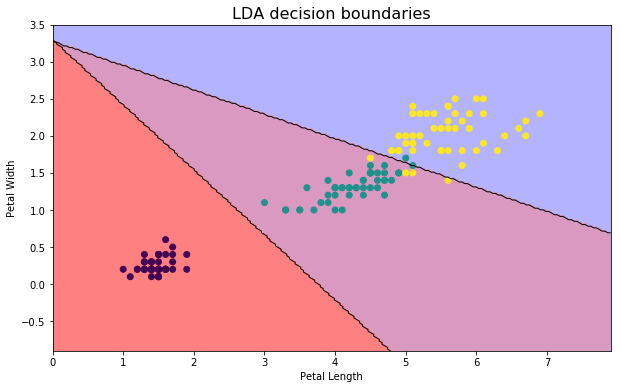

In [15]:
## Plotting LDA model decision boundaries
plt.figure(figsize=(10, 6))
plot_model(LDA, iris_x[:, 0], iris_x[:, 1], label=iris_y)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("LDA decision boundaries", size = 16)

plt.show()

### Problem 2

There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.
    
The following codes may be a useful beginning:

In [50]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/spam_train.csv')
test = pd.read_csv('data/spam_test.csv')


In [51]:
### your solution

# changing the response variable to binary (0,1)

train[['spam']] = train.spam=='spam'
train[['spam']] = 1*train[['spam']]

test[['spam']] = test.spam=='spam'
test[['spam']] = 1*test[['spam']]

# building test/train x and y:

x_train = train.iloc[:, 0:57]
y_train = train.iloc[:,-1]

x_test = test.iloc[:, 0:57]
y_test = test.iloc[:,-1]

In [58]:
# logistic regression:

from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.set_params(C=1e4)
logit_model.fit(x_train, y_train)

print 'logistic regression model accuracy (training dataset): %.4f' %logit_model.score(x_train, y_train)
print 'logistic regression model accuracy (test dataset): %.4f' %logit_model.score(x_test, y_test)


logistic regression model accuracy (training dataset): 0.9370
logistic regression model accuracy (test dataset): 0.9279


In [61]:
# Multinomial Naive Bayes:

from sklearn import naive_bayes
mnb_model = naive_bayes.MultinomialNB()
logit_model.set_params(C=1e4)
mnb_model.fit(x_train, y_train)
print("multinomial naive bayes accuracy (training dataset): %f" %mnb_model.score(x_train, y_train))
print("multinomial naive bayes accuracy (test dataset): %f" %mnb_model.score(x_test, y_test))


multinomial naive bayes accuracy (training dataset): 0.810870
multinomial naive bayes accuracy (test dataset): 0.798783


In [62]:
# Gaussain Naive Bayes:

from sklearn import naive_bayes
gnb_model = naive_bayes.GaussianNB()
gnb_model.fit(x_train, y_train)
print("gaussian naive bayes accuracy (training dataset): %f" %gnb_model.score(x_train, y_train))
print("gaussian naive bayes accuracy (test dataset): %f" %gnb_model.score(x_test, y_test))


gaussian naive bayes accuracy (training dataset): 0.830870
gaussian naive bayes accuracy (test dataset): 0.817036
